(212, 912, 912, 3)
(212, 128, 128)
1
11471
[0 1]


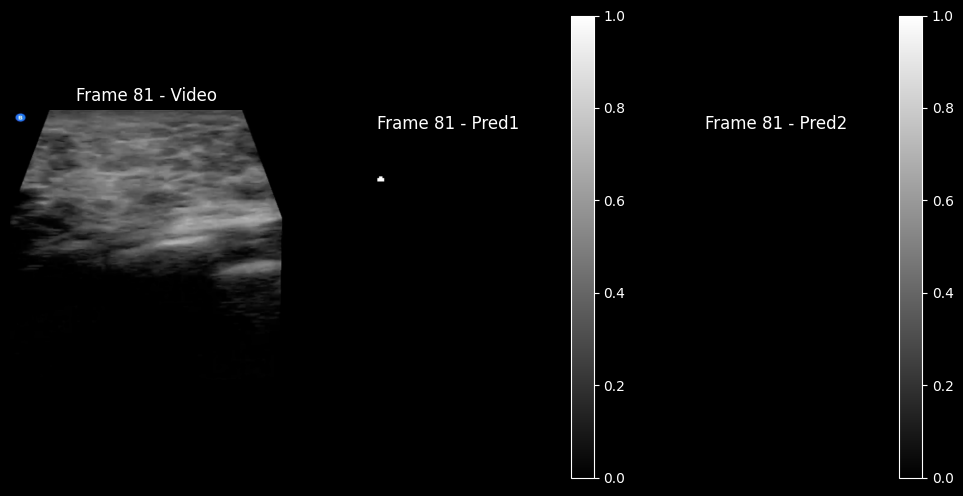

(212, 128, 128)


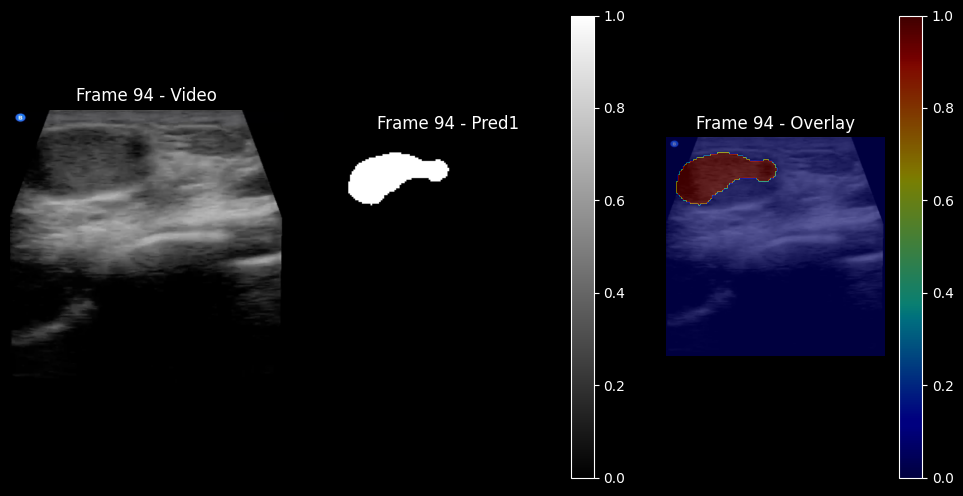

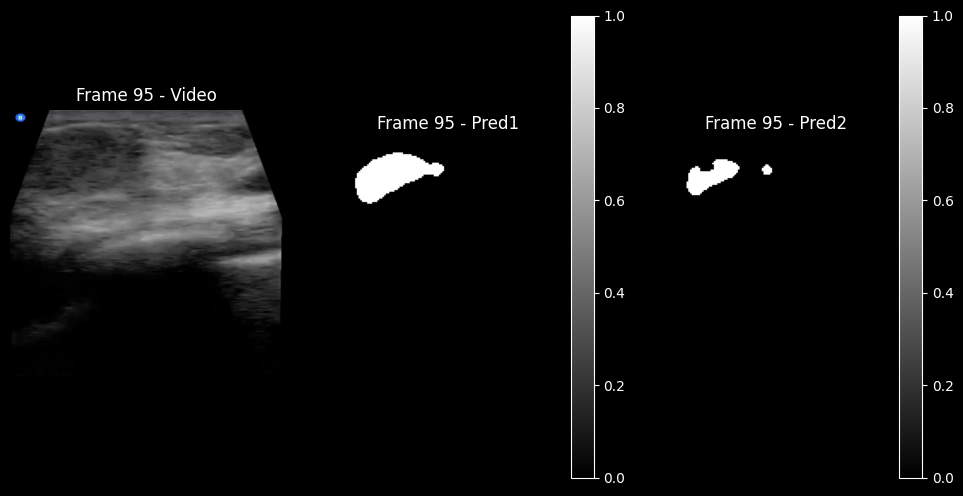

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torchio as tio
import torch
import cv2
import skvideo.io as skio
video_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/2/2.mp4'
gt_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/P4/mask/4.1.avi'
mask_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/predictions/2_mask.npy' #sin resize
mask_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/predictions/2_masken.npy' #sin resize
#mask_path2='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/predictions/2_maskr.npy' #con resize
mask_path2='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/predictions/2_maskenr.npy' #con resize

#mask_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/predictions/4.1_mask.npy'

video= skio.vread(video_path)
mask = np.squeeze(np.load(mask_path))
mask2=np.squeeze(np.load(mask_path2))
gt= skio.vread(gt_path)
print(video.shape)  # (D, H, W, C)
print(mask.shape)
print(np.max(mask))
print(np.sum(mask))
print(np.unique(mask))
#show the first frame of mask that is not zero
for i in range(mask.shape[0]):
    if np.any(mask[i]):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(video[i], cmap="gray")
        plt.title(f"Frame {i} - Video")
        plt.axis("off")
        plt.subplot(1, 3, 2)
        plt.imshow(mask[i], cmap="gray")
        plt.colorbar()
        plt.clim(0, 1)
        plt.title(f"Frame {i} - Pred1")
        plt.axis("off")
        plt.subplot(1, 3, 3)
        plt.imshow(mask2[i], cmap="gray")
        plt.colorbar()
        plt.title(f"Frame {i} - Pred2")
        plt.axis("off")
        plt.clim(0, 1)
        plt.show()
        break

i=94
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(video[i], cmap="gray")
plt.title(f"Frame {i} - Video")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(mask[i], cmap="gray")
plt.colorbar()
plt.title(f"Frame {i} - Pred1")
plt.axis("off")
plt.clim(0, 1)
#plot the overlay of the mask on the video
plt.subplot(1, 3, 3)
plt.imshow(video[i], cmap="gray")
plt.imshow(cv2.resize(mask[i], (912,912)), cmap="jet", alpha=0.5)  # Overlay mask
plt.colorbar()
plt.title(f"Frame {i} - Overlay")
plt.axis("off")
# plt.subplot(1, 3, 3)
# plt.imshow(mask2[i], cmap="gray")
# plt.colorbar()
# plt.title(f"Frame {i} - Pred2")
# plt.axis("off")
# plt.clim(0, 1)


#Resize label
label = tio.LabelMap(tensor=np.expand_dims(mask2, axis=0))  # shape (1,D,H,W)

label = tio.Resize((212, 128, 128))(label)  # resize to (1,D,H,W)
label= np.squeeze(label.data.numpy())  # shape (1,D,H,W)

print(label.shape)

i=95
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(video[i], cmap="gray")
plt.title(f"Frame {i} - Video")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(mask[i], cmap="gray")
plt.colorbar()
plt.title(f"Frame {i} - Pred1")
plt.axis("off")
plt.clim(0, 1)
plt.subplot(1, 3, 3)
plt.imshow(label[i], cmap="gray")
plt.colorbar()
plt.title(f"Frame {i} - Pred2")
plt.axis("off")
plt.clim(0, 1)
